# Train an online classifier

This notebook uses the float framework to load a binary classification data set and train a HoeffdingTree classifier from the scikit-multiflow library. This is done using float's PrequentialPipeline. The zero-one loss is used as an evaluation metric and is plotted over all time steps.

In [1]:
import os
os.chdir(os.getcwd()[:-6])

In [2]:
from float.data import DataLoader
from float.pipeline import PrequentialPipeline
from float.prediction.evaluation import PredictionEvaluator
from float.prediction.skmultiflow import SkmultiflowClassifier
from float.visualization import plot
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from skmultiflow.trees import HoeffdingTreeClassifier

In [3]:
data_loader = DataLoader(path='float/data/datasets/spambase.csv', target_col=-1)

predictor = SkmultiflowClassifier(HoeffdingTreeClassifier(), data_loader.stream.target_values, reset_after_drift=True)
pred_evaluator = PredictionEvaluator([zero_one_loss], decay_rate=0.1, window_size=10)

prequential_pipeline = prequential_pipeline = PrequentialPipeline(data_loader=data_loader,
                                                                  predictor=predictor,
                                                                  prediction_evaluator=pred_evaluator,
                                                                  n_max=data_loader.stream.n_samples)
prequential_pipeline.run()

Pretrain the predictor with 100 observation(s).
[====================] 100%
################################## SUMMARY ##################################
Evaluation has finished after 24.748351335525513s
Data Set float/data/datasets/spambase.csv
The pipeline has processed 4601 instances in total, using batches of size 1.
----------------------
Prediction:
| Model                   |   Avg. Test Comp. Time |   Avg. Train Comp. Time |   Avg. zero_one_loss |
|-------------------------|------------------------|-------------------------|----------------------|
| HoeffdingTreeClassifier |            0.000987053 |              0.00117239 |             0.180667 |
#############################################################################


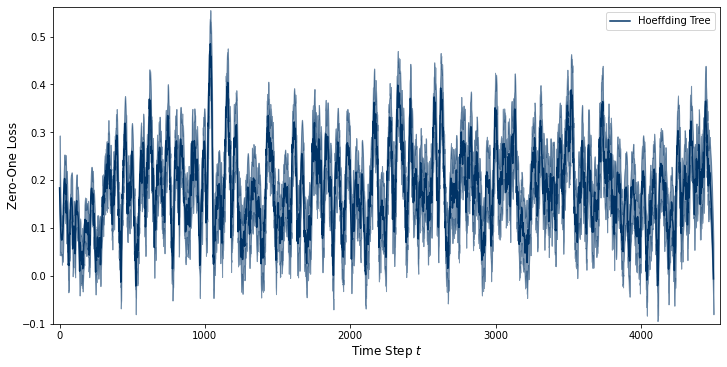

In [4]:
plot(measures=[pred_evaluator.result['zero_one_loss']['measures']],
     variances=[pred_evaluator.result['zero_one_loss']['var']],
     labels=['Hoeffding Tree'],
     measure_name='Zero-One Loss',
     measure_type='prediction',
     smooth_curve=[True])
plt.show()